# 4 - Building A Regression Model (K-NN)
I'm extremely happy with how gradient boosting turned out in my last post. I think I've just had xgboost on the brain... since it's worked so well in my last 2 projects. KNN should've been the first thing that came to my head when I thought about this haha. I don't think I've actually done a KNN before, so this is exciting!

## K-Nearest Neighbours
K-NN... one of the easiest algorithms lol. Take the K nearest points around you (with, let's say, Euclidean distance), average those values, and voila - you have your answer!

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_0011.png" style="width: 400px;"/>

In this _**classification**_ (remember, we're doing _**regression**_ in our property assessment project, but classification is just easier to demonstrate) example, the boundary lines are drawn for k = 15 and uniform weighting (all points have equal weight). This means that, for every point on the grid, if we took the 15 nearest neighbours and did a vote on what class the point should belong to, we would get the above decision boundaries. Hopefully I will be able to get something like that, but similar to a heat map for regression!

In [1]:
# Enable plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn makes our plots prettier
import seaborn
seaborn.set(style = 'ticks')

import numpy as np
import pandas as pd
import os
import gmaps
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load data set
edm_data = pd.read_csv('../data/Property_Assessment_Data.csv')

In [8]:
edm_data.dtypes

Account Number        int64
Suite                object
House Number        float64
Street Name          object
Assessed Value       object
Assessment Class     object
Neighbourhood        object
Garage               object
Latitude            float64
Longitude           float64
dtype: object

In [9]:
# Replace dollar signs and cast to int
edm_data['Assessed Value'] = edm_data['Assessed Value'].str.replace('$', '').astype(int)

In [10]:
# Filter for only residential buildings
edm_data_res = edm_data[edm_data['Assessment Class'] == 'Residential']

In [19]:
# Import ML libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [54]:
# Scale to mean 0 and standard deviation 1
lat_scaler = StandardScaler()
lng_scaler = StandardScaler()
edm_data_res['Latitude Scaled'] = lat_scaler.fit_transform(edm_data_res['Latitude'])
edm_data_res['Longitude Scaled'] = lng_scaler.fit_transform(edm_data_res['Longitude'])

print 'Latitude has mean {} and standard deviation {} ({} / {} before)'.format(
    edm_data_res['Latitude Scaled'].mean(), 
    edm_data_res['Latitude Scaled'].std(),
    edm_data_res['Latitude'].mean(),
    edm_data_res['Latitude'].std()
)

print 'Longitude has mean {} and standard deviation {} ({} / {} before)'.format(
    edm_data_res['Longitude Scaled'].mean(), 
    edm_data_res['Longitude Scaled'].std(),
    edm_data_res['Longitude'].mean(),
    edm_data_res['Longitude'].std()
)

/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

Latitude has mean -8.39668646084e-14 and standard deviation 1.000001376 (53.5212084209 / 0.0668533185807 before)
Longitude has mean -1.97593026608e-13 and standard deviation 1.000001376 (-113.51057506 / 0.0809892062884 before)


In [104]:
# Define x and y
x = edm_data_res[['Latitude Scaled', 'Longitude Scaled']].values
y = edm_data_res['Assessed Value'].values

print 'x has shape {}'.format(x.shape)
print 'y has shape {}'.format(y.shape)

x has shape (363373, 2)
y has shape (363373,)


In [56]:
# Set up grid search CV object to tune number of neighbours
k = np.arange(1, 16, 1)
print 'Testing knn for the following number of neighbours: {}'.format(k)

parameters = {'n_neighbors': k}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters, cv = 5, verbose = 2)

Testing knn for the following number of neighbours: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [57]:
# Fit model
clf.fit(x, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   1.8s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   1.7s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   1.4s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   1.4s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   1.4s
[CV] n_neighbors=2 ...................................................
[CV] .......................................... n_neighbors=2 -   1.5s
[CV] n_neighbors=2 ...................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:  1.1min


[CV] .......................................... n_neighbors=9 -   1.7s
[CV] n_neighbors=9 ...................................................
[CV] .......................................... n_neighbors=9 -   1.8s
[CV] n_neighbors=9 ...................................................
[CV] .......................................... n_neighbors=9 -   1.7s
[CV] n_neighbors=9 ...................................................
[CV] .......................................... n_neighbors=9 -   1.8s
[CV] n_neighbors=9 ...................................................
[CV] .......................................... n_neighbors=9 -   1.7s
[CV] n_neighbors=10 ..................................................
[CV] ......................................... n_neighbors=10 -   1.8s
[CV] n_neighbors=10 ..................................................
[CV] ......................................... n_neighbors=10 -   1.8s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [58]:
clf.best_params_

{'n_neighbors': 7}

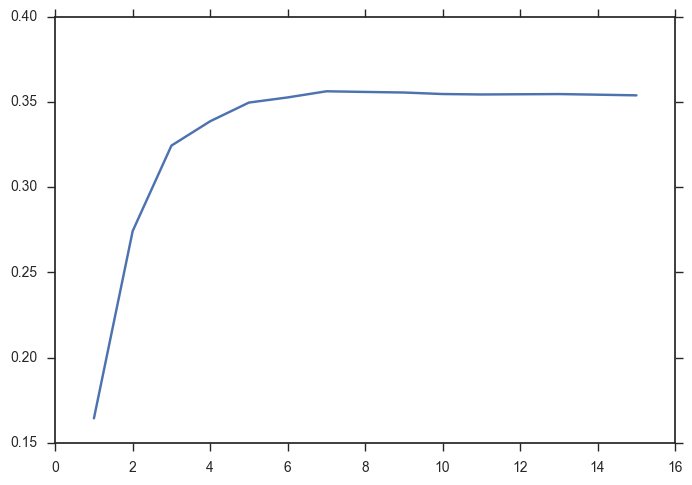

In [98]:
# Plot best score for k
plt.plot(k, [i[1] for i in clf.grid_scores_])

Apparently 7 nearest neighbours is the best model via GridSearchCV. We can see that, after 7, it really doesn't matter anymore. Let's try to build our grid and map it with gmaps. Let's create our grid of sample points again.

In [43]:
# Generate statistics per neighborhood
edm_data_neighbour_grouped = edm_data_res.groupby(['Neighbourhood', 'Assessment Class']).agg({
    'Assessed Value': [np.mean, np.size],
    'Latitude': [np.mean],
    'Longitude': [np.mean]
}).reset_index()

In [44]:
# Show all neighbourhoods with greater than 20 units
neighbourhoods = edm_data_neighbour_grouped[edm_data_neighbour_grouped[('Assessed Value', 'size')] > 20].sort_values([('Assessed Value', 'mean')], ascending = False)
neighbourhoods.columns = neighbourhoods.columns.droplevel(-1)
neighbourhoods.columns = ['Neighbourhood', 'Assessment Class', 'Latitude', 'Assessment Value Mean', 'Units', 'Longitude']
neighbourhoods.tail()

,Neighbourhood,Assessment Class,Latitude,Assessment Value Mean,Units,Longitude
234,PEMBINA,Residential,53.601348,100976.420798,827,-113.545760
195,MAPLE RIDGE,Residential,53.501823,81647.368421,855,-113.362575
113,EVERGREEN,Residential,53.631798,63883.164006,689,-113.351332
333,WESTVIEW VILLAGE,Residential,53.552301,60355.477855,858,-113.696537
325,WEIR INDUSTRIAL,Residential,53.511274,13673.076923,52,-113.411331


In [46]:
# Define city boundaries
lng_min = -113.709582
lng_max = -113.297595
lat_min = 53.396169
lat_max = 53.672860

# Set padding if we want to expand map by certain amount
map_padding = 0
lng_min -= map_padding
lng_max += map_padding
lat_min -= map_padding
lat_max += map_padding

# Number of steps
num_steps = 50

# Calculate step sizes
lng_step_size = (lng_max - lng_min) / num_steps
lat_step_size = (lat_max - lat_min) / num_steps

print 'Longitude step size: {}'.format(lng_step_size)
print 'Latitude step size: {}'.format(lat_step_size)

Longitude step size: 0.00823974
Latitude step size: 0.00553382


In [47]:
# Import geopy
from geopy.distance import vincenty

# Generate grid of lat / long points
lat_lng_threshold = 1000

lng_pts = []
lat_pts = []

total_points = num_steps**2

i = 0
for lng in np.arange(lng_min, lng_max, lng_step_size):
    for lat in np.arange(lat_min, lat_max, lat_step_size):
        # Print only every cluster of iterations
        if i % 100 == 0:
            print 'Iteration {} / {}'.format(i, total_points)
        
        # Only keep point on grid if it's within 1km distance of a community
        neighbourhoods['Lat Lng Tuple'] = neighbourhoods[['Latitude', 'Longitude']].apply(tuple, axis = 1)
        neighbourhoods['Distance'] = neighbourhoods['Lat Lng Tuple'].apply(lambda x: vincenty(x, (lat, lng)).meters)

        if (neighbourhoods['Distance'].min() <= lat_lng_threshold):
            lng_pts.append(lng)
            lat_pts.append(lat)
        
        i += 1

Iteration 0 / 2500
Iteration 100 / 2500
Iteration 200 / 2500
Iteration 300 / 2500
Iteration 400 / 2500
Iteration 500 / 2500
Iteration 600 / 2500
Iteration 700 / 2500
Iteration 800 / 2500
Iteration 900 / 2500
Iteration 1000 / 2500
Iteration 1100 / 2500
Iteration 1200 / 2500
Iteration 1300 / 2500
Iteration 1400 / 2500
Iteration 1500 / 2500
Iteration 1600 / 2500
Iteration 1700 / 2500
Iteration 1800 / 2500
Iteration 1900 / 2500
Iteration 2000 / 2500
Iteration 2100 / 2500
Iteration 2200 / 2500
Iteration 2300 / 2500
Iteration 2400 / 2500


In [48]:
len(lng_pts)

1385

In [61]:
# Set up input dataframe, along with the scaled variables for input to model
x_edm_grid_test = pd.DataFrame({
    'Latitude': lat_pts,
    'Latitude Scaled': lat_scaler.transform(lat_pts),
    'Longitude': lng_pts,
    'Longitude Scaled': lng_scaler.transform(lng_pts)
})

print 'Latitude has mean {} and standard deviation {} ({} / {} before)'.format(
    x_edm_grid_test['Latitude Scaled'].mean(), 
    x_edm_grid_test['Latitude Scaled'].std(),
    x_edm_grid_test['Latitude'].mean(),
    x_edm_grid_test['Latitude'].std()
)

print 'Longitude has mean {} and standard deviation {} ({} / {} before)'.format(
    x_edm_grid_test['Longitude Scaled'].mean(), 
    x_edm_grid_test['Longitude Scaled'].std(),
    x_edm_grid_test['Longitude'].mean(),
    x_edm_grid_test['Longitude'].std()
)

Latitude has mean 0.0289406857861 and standard deviation 1.02440004116 (53.5231431991 / 0.0684844480713 before)
Longitude has mean -0.030679183724 and standard deviation 1.16229491467 (-113.513059739 / 0.0941332130852 before)


/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [62]:
# Make predictions
x_edm_grid_test['y_edm_grid_pred'] = clf.predict(x_edm_grid_test[['Latitude Scaled', 'Longitude Scaled']])

In [66]:
# Create new log column
x_edm_grid_test['y_edm_grid_pred_log'] = x_edm_grid_test['y_edm_grid_pred'].apply(lambda x: np.sign(x)*(np.log10(np.abs(x)+1)))

In [68]:
# Remove heavy outliers on the negative side
x_edm_grid_test_no_outliers = x_edm_grid_test[x_edm_grid_test['y_edm_grid_pred_log'].between(3, 8)]

In [70]:
# Scale responese from 0 to 1 to match gmaps opacity parameter
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_edm_grid_test_no_outliers['y_edm_grid_pred_log_scaled'] = scaler.fit_transform(x_edm_grid_test_no_outliers['y_edm_grid_pred_log'])

/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [64]:
# Import gmaps library and initial config
import gmaps
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [78]:
# Plot gmaps
edm_grid_heatmap = gmaps.heatmap_layer(
    x_edm_grid_test_no_outliers[['Latitude', 'Longitude']], 
    max_intensity = 10,
    weights = np.array(x_edm_grid_test_no_outliers['y_edm_grid_pred_log_scaled'].tolist())*7
    ,
    opacity = 0.4
)

edm_grid_fig = gmaps.figure()
edm_grid_fig.add_layer(edm_grid_heatmap)
edm_grid_fig

![](https://s3.ca-central-1.amazonaws.com/2017edmfasatb/edmonton_property_assessment/images/knn_7_heatmap.png)

Cool, the graph is more red than general, but we see many of the same hot spots on the map! Along the river, In the south, in the southwest, up north, that little island thing by sherwood park. I'm not quite sure which one is better, but I think the map generated from xgboost is a bit more clear in where the hot spots are. Perhaps if we widened our KNN net, we could see smoother hot spots as well! Let's try like... K = 15.

In [105]:
# Generate k = 15 knn regressor
knn_15 = KNeighborsRegressor(n_neighbors = 15)
knn.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

In [106]:
# Make predictions
x_edm_grid_test['y_edm_grid_pred_knn_15'] = knn.predict(x_edm_grid_test[['Latitude Scaled', 'Longitude Scaled']])

# Create new log column
x_edm_grid_test['y_edm_grid_pred_knn_15_log'] = x_edm_grid_test['y_edm_grid_pred_knn_15'].apply(lambda x: np.sign(x)*(np.log10(np.abs(x)+1)))

# Remove heavy outliers on the negative side
x_edm_grid_test_no_outliers = x_edm_grid_test[x_edm_grid_test['y_edm_grid_pred_knn_15_log'].between(3, 8)]

# Scale
x_edm_grid_test_no_outliers['y_edm_grid_pred_knn_15_log_scaled'] = scaler.transform(x_edm_grid_test_no_outliers['y_edm_grid_pred_knn_15_log'])

/Users/chiwang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [107]:
# Plot gmaps
edm_grid_heatmap_knn_15 = gmaps.heatmap_layer(
    x_edm_grid_test_no_outliers[['Latitude', 'Longitude']], 
    max_intensity = 10,
    weights = np.array(x_edm_grid_test_no_outliers['y_edm_grid_pred_knn_15_log_scaled'].tolist())*7
    ,
    opacity = 0.4
)

edm_grid_fig_knn_15 = gmaps.figure()
edm_grid_fig_knn_15.add_layer(edm_grid_heatmap_knn_15)
edm_grid_fig_knn_15

![](https://s3.ca-central-1.amazonaws.com/2017edmfasatb/edmonton_property_assessment/images/knn_15_heatmap.png)

The hot spots aren't as big or red... I think I like knn = 7 better for visualization purposes. This would make sense... the more neighbours you use, the more the visualization would just converge to the one median color because you're taking the average of more and more points.

For me, I think that wraps it up for K-NN! Short and sweet post for a very simple but effective method!